In [0]:
# Fill in your name using the format below and student ID number
your_name = "Zahariev, Tsvetan"
student_id = "1035269"

In [0]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [0]:
# Uncomment the following line to run in Google Colab
!pip install --quiet openml
#!pip uninstall tensorflow
!pip install tensorflow-gpu

In [4]:
# Uncomment the following line to run in Google Colab
%tensorflow_version 2.x
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [0]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [6]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi Tsvetan, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [0]:
#base_dir = '/content/drive/My Drive/TestAssignment' # For Google Colab
#base_dir = 'D:\GitRepos\assignment-3-T-Zahariev'
base_dir = '/content/drive/My Drive/assignment-3-T-Zahariev'

In [9]:
#Uncomment to link Colab notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [0]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
import os
oml.config.cache_directory = os.path.expanduser('/content/cache')

In [0]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [0]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [0]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

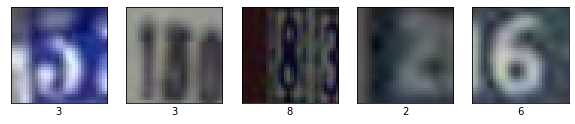

In [14]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [0]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Training the model
Train on 63544 samples, validate on 15887 samples
Epoch 1/10
63544/63544 [==============================] - 11s 174us/sample - loss: 1.8951 - accuracy: 0.3558 - val_loss: 1.4536 - val_accuracy: 0.5512
Epoch 2/10
63544/63544 [==============================] - 9s 143us/sample - loss: 1.2942 - accuracy: 0.5910 - val_loss: 1.3722 - val_accuracy: 0.5404
Epoch 3/10
63544/63544 [==============================] - 9s 143us/sample - loss: 1.0812 - accuracy: 0.6637 - val_loss: 1.0218 - val_accuracy: 0.6823
Epoch 4/10
63544/63544 [==============================] - 9s 143us/sample - loss: 0.9624 - accuracy: 0.7022 - val_loss: 0.9097 - val_accuracy: 0.7249
Epoch 5/10
63544/63544 [==============================] - 9s 142us/sample - loss: 0.8852 - accuracy: 0.7275 - val_loss: 0.8514 - val_accuracy: 0.7436
Epoch 6/10
63544/63544 [==============================] - 9s 142us/sample - loss: 0.8270 - accuracy: 0.7460 - val_loss: 0.8709 - val_accuracy: 0.7335
Epoch 7/10
63544/63544 [======

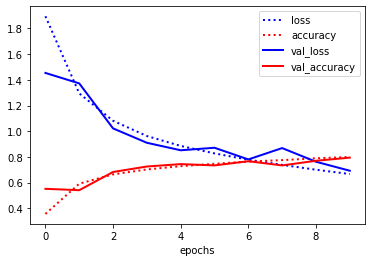

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers 

def build_model_1_1():
    model_1_1 = models.Sequential()
    #model_1_1.add(layers.Reshape((3072,), input_shape=(32*32,)))
    model_1_1.add(layers.Flatten())
    model_1_1.add(layers.Dense(3072, activation='relu'))
    model_1_1.add(layers.Dense(1536, activation='relu'))
    model_1_1.add(layers.Dense(784, activation='relu'))
    model_1_1.add(layers.Dense(10, activation='softmax'))
    model_1_1.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model_1_1
run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=True, epochs=10, batch_size=32)
answer_q_1_1 = """
               Only 3 hidden Dense layers plus one Flatten. Flatten layer is to 
               just transform the input to handle different dimensional inputs. 
               First layer has 3072 Nodes as 32*32*3 = 3072. Then start to halve
               the following layers. Last layer in an output with 10 nodes as we
               have 10 classes. SGD was the best performing optimizer, as it is
               fast, causes the loss func to fluctuate discovering new and
               possibly better minima. (Note: Specifying the input shape in the
               first hidden layer crashed on the following question, so I
               used Flatten to make it more general)
               """
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [0]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

Training the model
Train on 63544 samples, validate on 15887 samples
Epoch 1/10
63544/63544 [==============================] - 9s 138us/sample - loss: 2.0207 - accuracy: 0.2993 - val_loss: 1.6630 - val_accuracy: 0.4640
Epoch 2/10
63544/63544 [==============================] - 8s 130us/sample - loss: 1.4067 - accuracy: 0.5542 - val_loss: 1.3152 - val_accuracy: 0.5766
Epoch 3/10
63544/63544 [==============================] - 8s 129us/sample - loss: 1.1483 - accuracy: 0.6438 - val_loss: 1.0902 - val_accuracy: 0.6663
Epoch 4/10
63544/63544 [==============================] - 8s 130us/sample - loss: 1.0216 - accuracy: 0.6862 - val_loss: 1.1682 - val_accuracy: 0.6451
Epoch 5/10
63544/63544 [==============================] - 8s 131us/sample - loss: 0.9337 - accuracy: 0.7140 - val_loss: 0.9388 - val_accuracy: 0.7180
Epoch 6/10
63544/63544 [==============================] - 8s 131us/sample - loss: 0.8659 - accuracy: 0.7354 - val_loss: 0.8823 - val_accuracy: 0.7307
Epoch 7/10
63544/63544 [=======

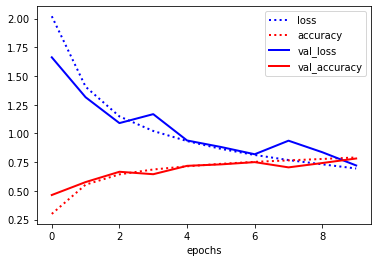

In [18]:
from tensorflow.keras import models
from tensorflow.keras import layers 

# Replace with the preprocessed data
X_train_gray = rgb2gray(X_train)
X_val_gray = rgb2gray(X_val)

preprocessed_split = X_train_gray, X_val_gray, y_train, y_val
preprocessed_split2 = X_train, X_val, y_train, y_val

# Adjusted model
def build_model_1_2():
    model_1_2 = models.Sequential()
    model_1_2.add(layers.Flatten())
    model_1_2.add(layers.Dense(3072, activation='relu'))
    model_1_2.add(layers.Dense(1536, activation='relu'))
    model_1_2.add(layers.Dense(784, activation='relu'))
    model_1_2.add(layers.Dense(10, activation='softmax'))
    model_1_2.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model_1_2

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=True, epochs=10, batch_size=32)
answer_q_1_2 = """
               Structure of the mode is exactly the same as the previous.
               Here the data is converted from RGB to gray scale thus also
               reducing its shape to 32*32*1. Causing the first layer to have 3
               times as many nodes relative to input. Gray scaling reduced
               slightly the resilts but the learning is smoother. Less
               over/under fitting. Model generalizes well as the loss and
               accuracy for both train/test sets are close.
               """
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Training the model
Train on 63544 samples, validate on 15887 samples
Epoch 1/10
63544/63544 [==============================] - 10s 163us/sample - loss: 2.0776 - accuracy: 0.2895 - val_loss: 1.7478 - val_accuracy: 0.4128
Epoch 2/10
63544/63544 [==============================] - 10s 152us/sample - loss: 1.4768 - accuracy: 0.5440 - val_loss: 1.3345 - val_accuracy: 0.6017
Epoch 3/10
63544/63544 [==============================] - 9s 141us/sample - loss: 1.2189 - accuracy: 0.6357 - val_loss: 1.1397 - val_accuracy: 0.6653
Epoch 4/10
63544/63544 [==============================] - 9s 140us/sample - loss: 1.0932 - accuracy: 0.6806 - val_loss: 1.0924 - val_accuracy: 0.6781
Epoch 5/10
63544/63544 [==============================] - 9s 141us/sample - loss: 1.0090 - accuracy: 0.7074 - val_loss: 0.9575 - val_accuracy: 0.7297
Epoch 6/10
63544/63544 [==============================] - 9s 140us/sample - loss: 0.9423 - accuracy: 0.7285 - val_loss: 0.9180 - val_accuracy: 0.7370
Epoch 7/10
63544/63544 [=====

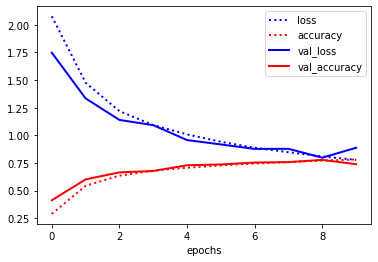

In [19]:
from tensorflow.keras import regularizers
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model_1_3():
    model_1_3 = models.Sequential()
    model_1_3.add(layers.Flatten())
    model_1_3.add(layers.Dense(3072, kernel_regularizer=regularizers.l2(0.00001),
                               activation='relu'))
    model_1_3.add(layers.Dense(1536, kernel_regularizer=regularizers.l2(0.00),
                               activation='relu'))
    model_1_3.add(layers.Dense(784, kernel_regularizer=regularizers.l2(0.00),
                               activation='relu'))
    model_1_3.add(layers.Dense(10, kernel_regularizer=regularizers.l2(0.001),
                               activation='softmax'))
    model_1_3.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model_1_3
run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=True, epochs=10, batch_size=32)
answer_q_1_3 = """
               Again same structure. Now each layer has a level 2 regularizer.
               Only on the first and output layer the regularizer take effect
               as the others are set to 0. Generally the model in the rpevious
               section barely overfits, hence using regularization negatively
               affect this model. SO that's why the values are small and present
               only on two layers. The larger values I tried the worse the model
               performed. Hence regularizers are not really necessary here.
               """
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Training the model
Train on 63544 samples, validate on 15887 samples
Epoch 1/25
63544/63544 [==============================] - 27s 424us/sample - loss: 0.7573 - accuracy: 0.7708 - val_loss: 0.3734 - val_accuracy: 0.8868
Epoch 2/25
63544/63544 [==============================] - 19s 306us/sample - loss: 0.3643 - accuracy: 0.8931 - val_loss: 0.3623 - val_accuracy: 0.8899
Epoch 3/25
63544/63544 [==============================] - 19s 306us/sample - loss: 0.3102 - accuracy: 0.9113 - val_loss: 0.2394 - val_accuracy: 0.9281
Epoch 4/25
63544/63544 [==============================] - 20s 308us/sample - loss: 0.2732 - accuracy: 0.9224 - val_loss: 0.2251 - val_accuracy: 0.9346
Epoch 5/25
63544/63544 [==============================] - 19s 306us/sample - loss: 0.2529 - accuracy: 0.9280 - val_loss: 0.2220 - val_accuracy: 0.9349
Epoch 6/25
63544/63544 [==============================] - 19s 306us/sample - loss: 0.2378 - accuracy: 0.9331 - val_loss: 0.2185 - val_accuracy: 0.9371
Epoch 7/25
63544/63544 [=

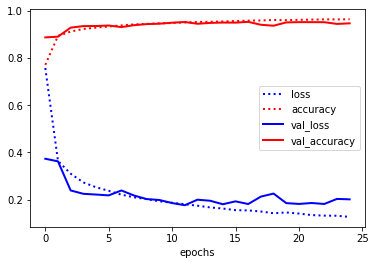

In [20]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model_2_1():
    model_2_1 = models.Sequential()
    model_2_1.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                                input_shape=(32, 32, 1)))
    model_2_1.add(layers.BatchNormalization())
    model_2_1.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model_2_1.add(layers.BatchNormalization())
    model_2_1.add(layers.MaxPooling2D((2, 2)))
    model_2_1.add(layers.Dropout(0.2))
    model_2_1.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model_2_1.add(layers.BatchNormalization())
    model_2_1.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model_2_1.add(layers.BatchNormalization())
    model_2_1.add(layers.MaxPooling2D((2, 2)))
    model_2_1.add(layers.Dropout(0.3))
    model_2_1.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model_2_1.add(layers.BatchNormalization())
    model_2_1.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model_2_1.add(layers.BatchNormalization())
    model_2_1.add(layers.MaxPooling2D((2, 2)))
    model_2_1.add(layers.Dropout(0.4))
    model_2_1.add(layers.Flatten())
    model_2_1.add(layers.Dense(128, activation='relu'))
    model_2_1.add(layers.BatchNormalization())
    model_2_1.add(layers.Dropout(0.5))
    model_2_1.add(layers.Dense(10, activation='softmax'))
    model_2_1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model_2_1

run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=True, epochs=25, batch_size=32)
answer_q_2_1 = """
                The CNN follows the same structure as the one presented in the
                labs. Here the input shape is different 32*32*1 as we are
                dealing with grayscale images. In total we have 6 convolutional
                layers. After each conv layer we do a batch normalization to
                speed up learning and also reduce the covariance shift.
                Additionally with batch normalizaiton we reduce overfitting thus
                achieving slight regularization. In order to improve
                regularization we have 4 droput layers to get rid of unnecassary
                nodes which might stop us from learning well. We have 3 Max-
                Pooling layers which help with reducing overfitting and reduce
                the need of deeper networks. The model performs well, actually
                one can reduce the training epochs as the model starts to
                overfit after epoch 10.
               """
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

Training the model
  ...
    to  
  ['...']
Train for 1985 steps, validate on 15887 samples
Epoch 1/25
1985/1985 [==============================] - 36s 18ms/step - loss: 1.6886 - accuracy: 0.4414 - val_loss: 0.6842 - val_accuracy: 0.7803
Epoch 2/25
1985/1985 [==============================] - 33s 17ms/step - loss: 0.8997 - accuracy: 0.7042 - val_loss: 1.0068 - val_accuracy: 0.6927
Epoch 3/25
1985/1985 [==============================] - 33s 16ms/step - loss: 0.7342 - accuracy: 0.7661 - val_loss: 0.4070 - val_accuracy: 0.8718
Epoch 4/25
1985/1985 [==============================] - 33s 16ms/step - loss: 0.6599 - accuracy: 0.7924 - val_loss: 0.4267 - val_accuracy: 0.8667
Epoch 5/25
1985/1985 [==============================] - 32s 16ms/step - loss: 0.6119 - accuracy: 0.8079 - val_loss: 0.3636 - val_accuracy: 0.8847
Epoch 6/25
1985/1985 [==============================] - 32s 16ms/step - loss: 0.5799 - accuracy: 0.8191 - val_loss: 0.3544 - val_accuracy: 0.8906
Epoch 7/25
1985/1985 [==========

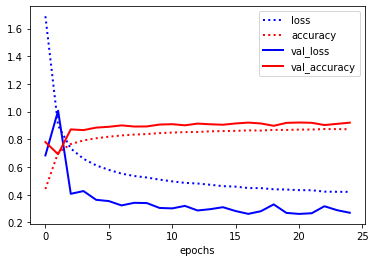

In [21]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

#augmented_split = preprocessed_split
augmented_data = train_datagen.flow(preprocessed_split[0], preprocessed_split[2], batch_size=32)
augmented_split = augmented_data, preprocessed_split[1], preprocessed_split[3]

steps = int(X_train.shape[0] / 32)

run_evaluation("model_2_2", build_model_2_1, data=augmented_split, base_dir=base_dir, 
               train=True, generator=True, epochs=25, steps_per_epoch=steps,
               batch_size=None)
answer_q_2_2 = """
               Most image changes are allowed. In general this is not really
               need given the size of our dataset. However with the newly
               generated images we have introduced noisy images because of the
               fill reducing performance on training data, but still keeping
               good performance on testing data. When using batch_size=64, we
               also have too large batches and loose data. Hence the batch size
               was reduced to 32 which gave decent resutls.
               """
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

Model has accuracy of:
0.9181689998992849


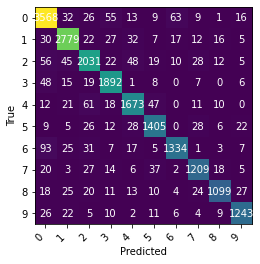

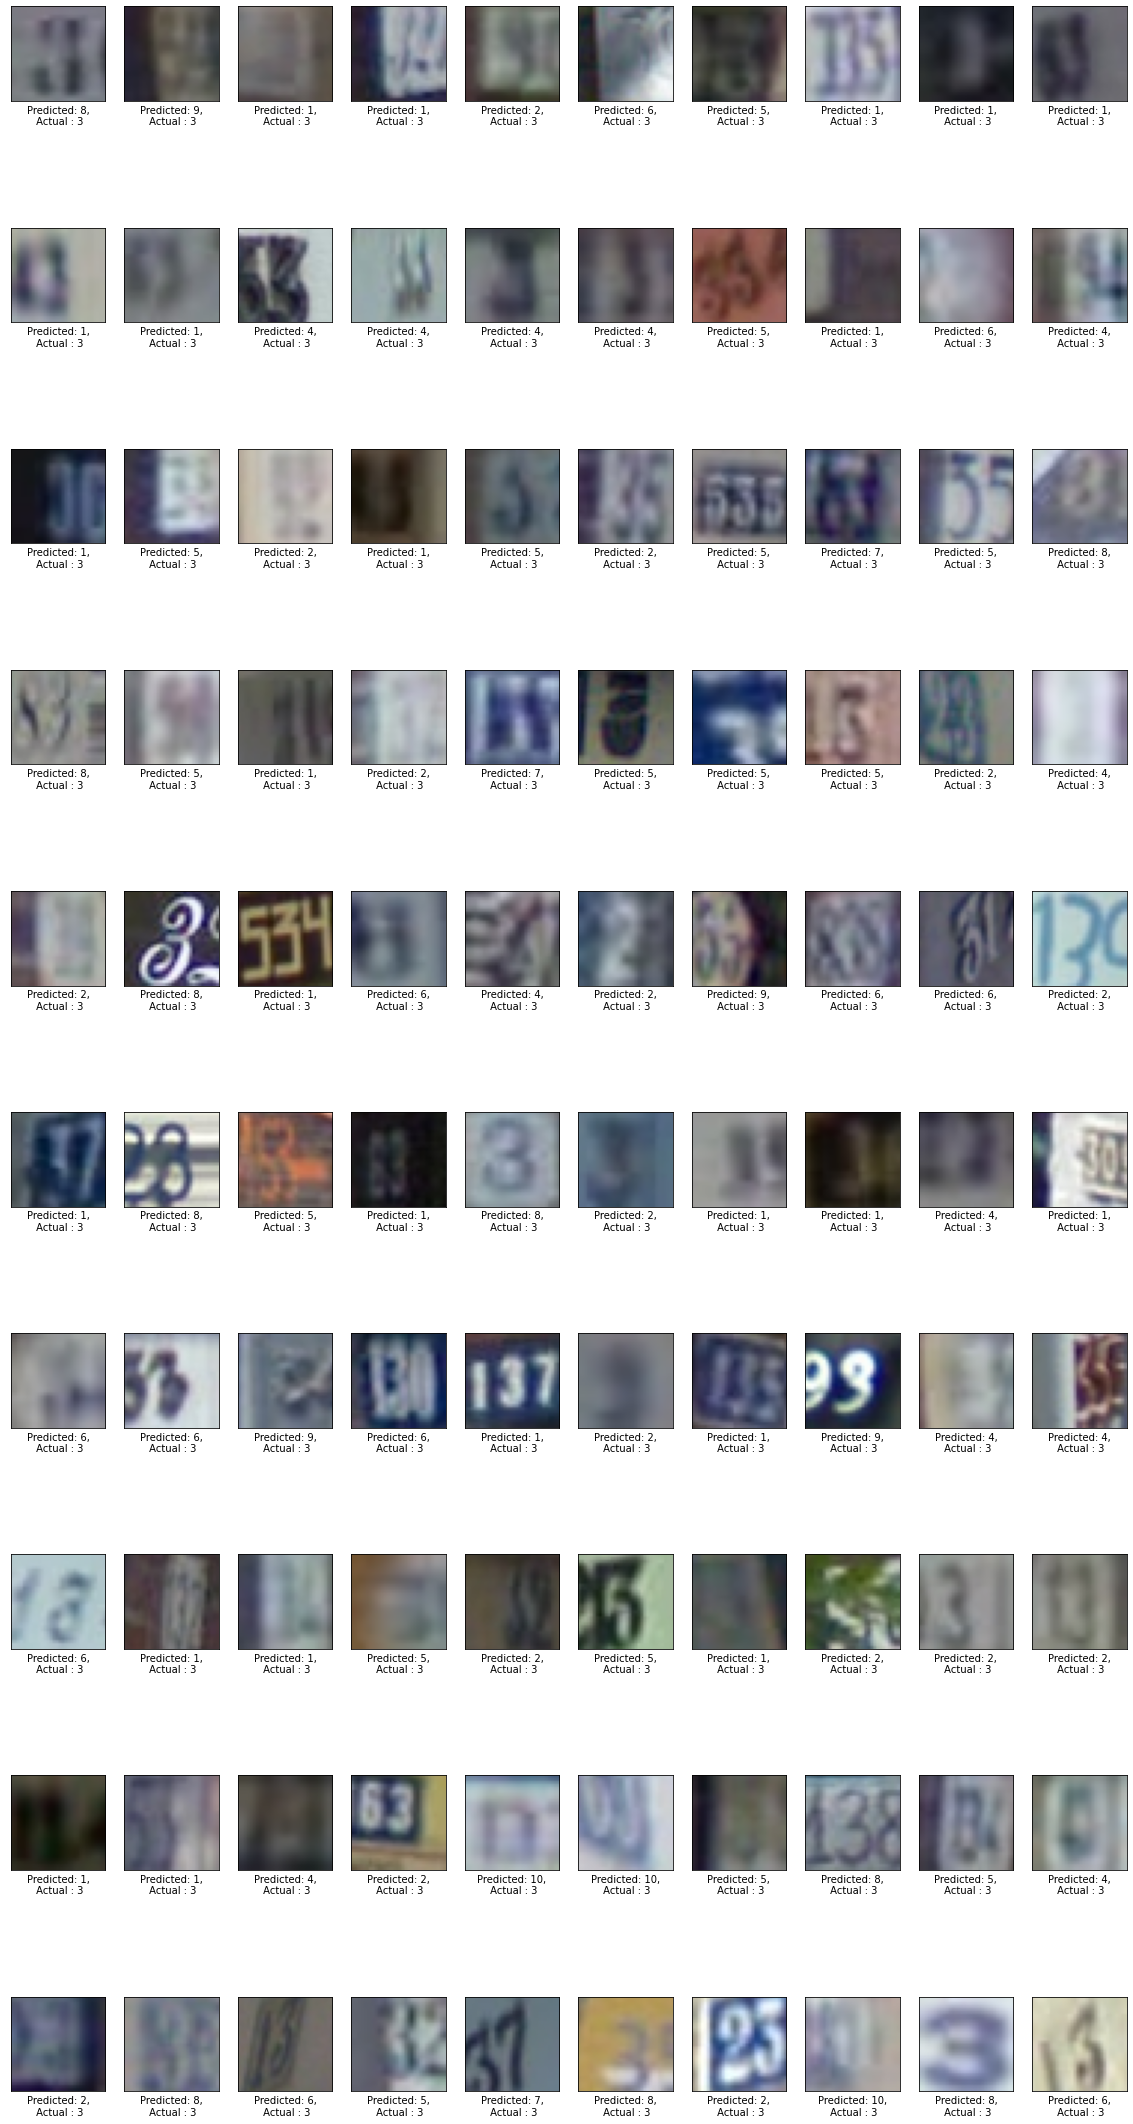

Answer is 899 characters long


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

model_3_1 = load_model_from_file(base_dir, "model_2_2", extension='.h5')
y_pred = model_3_1.predict(rgb2gray(X_test))

y_test_reformed = []
y_pred_reformed = []

def reform_y_pred_and_y_test():
    for label in y_test:
        index_max = np.argmax(label)
        y_test_reformed.append(index_max)
    
    for label in y_pred:
        index_max = np.argmax(label)
        y_pred_reformed.append(index_max)

reform_y_pred_and_y_test()

test_accuracy_3_1 = accuracy_score(y_test_reformed, y_pred_reformed)
print("Model has accuracy of:")
print(test_accuracy_3_1)

def plot_confusion_matrix():
    cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
    fig, ax = plt.subplots()
    im = ax.imshow(cm)
    ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
    ax.set_xticklabels(list(range(10)), rotation=45, ha="right")
    ax.set_yticklabels(list(range(10)))
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')
    for i in range(100):
        ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

def plot_misclassifications():
    misclassified_samples = np.nonzero(np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1))[0]
    misclassified_samples2 = []
    for ind in range(len(y_test)):
        if np.argmax(y_test[ind]) != np.argmax(y_pred[ind]):
            if np.argmax(y_test[ind]) == 2:
                misclassified_samples2.append(ind)

    fig, axes = plt.subplots(10, 10,  figsize=(20, 40))
    for nr, i in enumerate(misclassified_samples2[:100]):
        axes[int(nr/10)][int(nr%10)].imshow(X_test[i])
        axes[int(nr/10)][int(nr%10)].set_xlabel("Predicted: %s,\n Actual : %s" % (list(range(10))[np.argmax(y_pred[i])]+1,list(range(10))[np.argmax(y_test[i])]+1))
        axes[int(nr/10)][int(nr%10)].set_xticks(()), axes[int(nr/10)][int(nr%10)].set_yticks(())
    plt.show()

plot_confusion_matrix()
plot_misclassifications()

answer_q_3_1 = """
               From the matrix one can see that the most misclassified digits
               are 6 and 0. We have decided to examine the class of the digit 3.
               When computing the accuracy on the testing dat we can see that it
               is quite similar to the one obtained in the previous question.
               From the images one can see that the NN confuses the 3 a lot with
               8,5,2,9 and some others. However most of the images are of very
               blurry. Additionally some images do indeed look similar.
               Some 3 are fancy and look like 8 as there is barely any
               space between the lines. When confusing 3 for 9 the 3 has an
               almost circle like top and open bottom part. For 2,5 a simlar
               reason applies. Sometimes it recognizes the wrong digit, not the
               one in focus.
               """
print("Answer is {} characters long".format(len(answer_q_3_1)))

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


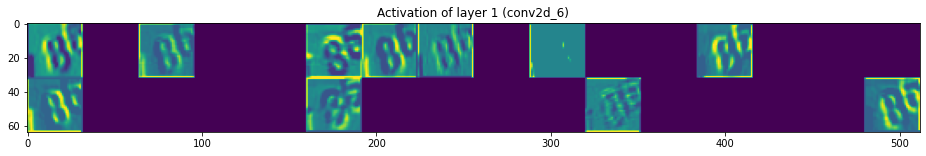

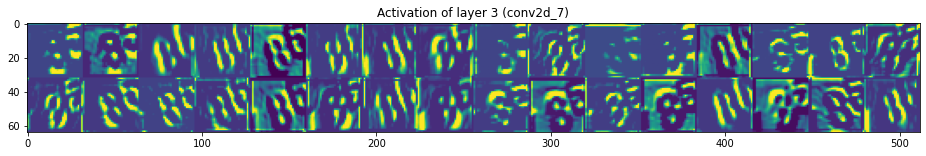

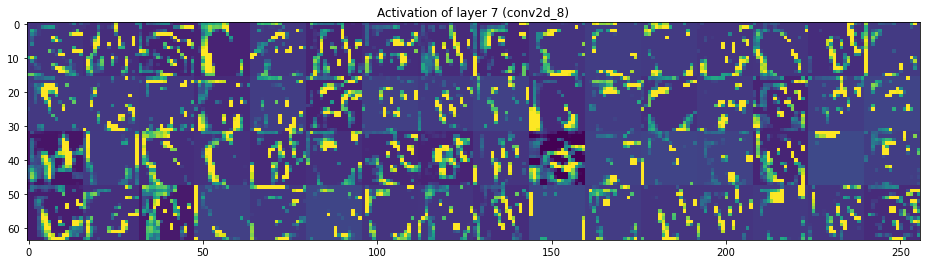

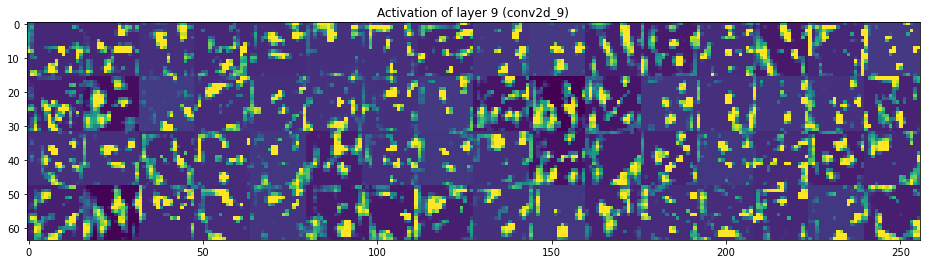

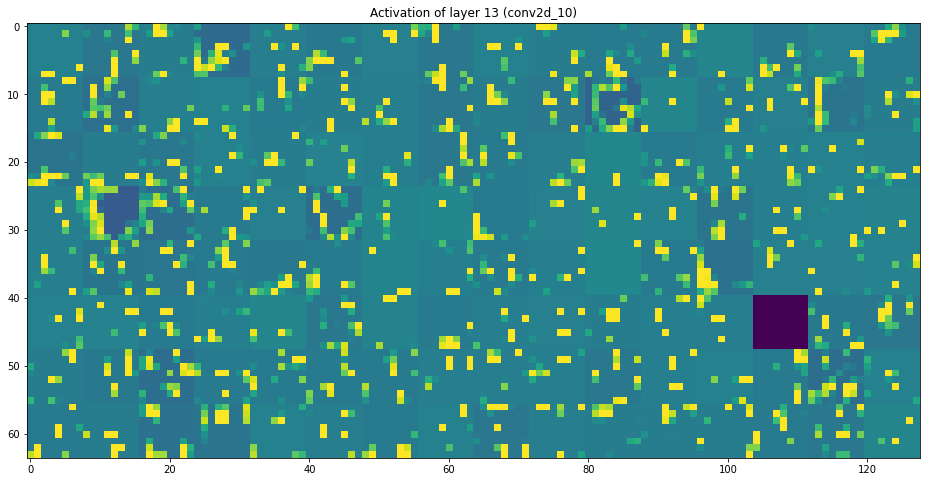

Answer is 611 characters long


In [23]:
model_3_2 = load_model_from_file(base_dir, "model_2_2", extension='.h5')
#model_3_2.summary()

images_per_row = 16

img_tensor = rgb2gray(X_test)[0]
img_tensor = np.expand_dims(img_tensor, axis=0) 

layer_outputs = [layer.output for layer in model_3_2.layers[:15]]
layer_names = [layer.name for layer in model_3_2.layers[:15]]

activation_model = models.Model(inputs=model_3_2.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

def plot_activations():
    start = layer_index
    end = layer_index+1
    # Now let's display our feature maps
    for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
        # This is the number of features in the feature map
        n_features = layer_activation.shape[-1]

        # The feature map has shape (1, size, size, n_features)
        size = layer_activation.shape[1]

        # We will tile the activation channels in this matrix
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        # We'll tile each filter into this big horizontal grid
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image

        # Display the grid
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title("Activation of layer {} ({})".format(layer_index+1,layer_name))
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
    plt.show()

layer_index = 2
interesting = [0, 2, 6, 8, 12]
for i in interesting:
    layer_index=i
    plot_activations() # Change the layer index to see other layers


answer_q_3_2 = """
              I have decided to focus only on the most interesting layers.
              In the first interesting layer we can see how the CNN focuses on
              diagonal lines, circles, lines, half-circles, edges, maybe at
              times on horizontal lines. The second interesting layer shows how
              the CNN focuses on the background and from here on now for the
              layers it becomes harder to see on what exactly the filter focuses
              on. The very first conv layer appears to have many blank filter
              which are of no use for this digit
               """
print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

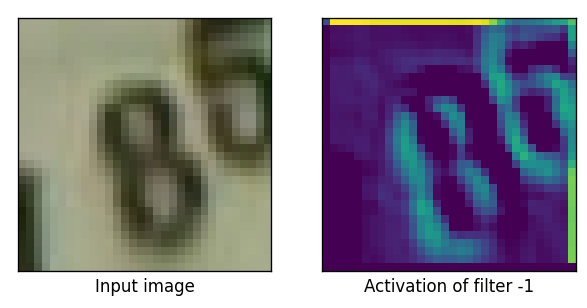

In [24]:
def plot_3_3():

    model_3_3 = load_model_from_file(base_dir, "model_2_2", extension='.h5')

    img_tensor = rgb2gray(X_test)[0]
    img_tensor = np.expand_dims(img_tensor, axis=0)

    img_tensor_color = X_test[0]
    img_tensor_color = np.expand_dims(img_tensor_color, axis=0)  

    layer_outputs = [layer.output for layer in model_3_3.layers[:15]]
    layer_names = [layer.name for layer in model_3_3.layers[:15]]

    activation_model = models.Model(inputs=model_3_3.input, outputs=layer_outputs)
    activations = activation_model.predict(img_tensor)

    plt.rcParams['figure.dpi'] = 120
    first_layer_activation = activations[0]

    for i in range(-1,0):
        f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
        ax1.imshow(img_tensor_color[0])
        ax2.matshow(first_layer_activation[0, :, :, i], cmap='viridis')
        ax1.set_xticks([])
        ax1.set_yticks([])
        ax2.set_xticks([])
        ax2.set_yticks([])
        ax1.set_xlabel('Input image')
        ax2.set_xlabel('Activation of filter ' + str(i));

plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

58892288/58889256 [==============================] - 2s 0us/step
Training the model
Train on 63544 samples, validate on 15887 samples
Epoch 1/25
63544/63544 [==============================] - 25s 387us/sample - loss: 1.3828 - accuracy: 0.5216 - val_loss: 1.2358 - val_accuracy: 0.5656
Epoch 2/25
63544/63544 [==============================] - 24s 371us/sample - loss: 1.0848 - accuracy: 0.6256 - val_loss: 1.0281 - val_accuracy: 0.6455
Epoch 3/25
63544/63544 [==============================] - 24s 370us/sample - loss: 0.9704 - accuracy: 0.6684 - val_loss: 1.1601 - val_accuracy: 0.5869
Epoch 4/25
63544/63544 [==============================] - 24s 370us/sample - loss: 0.8949 - accuracy: 0.6943 - val_loss: 1.0401 - val_accuracy: 0.6504
Epoch 5/25
63544/63544 [==============================] - 24s 375us/sample - loss: 0.8437 - accuracy: 0.7108 - val_loss: 0.8645 - val_accuracy: 0.7066
Epoch 6/25
63544/63544 [==============================] - 24s 378us/sample - loss: 0.7949 - accuracy: 0.7285 - 

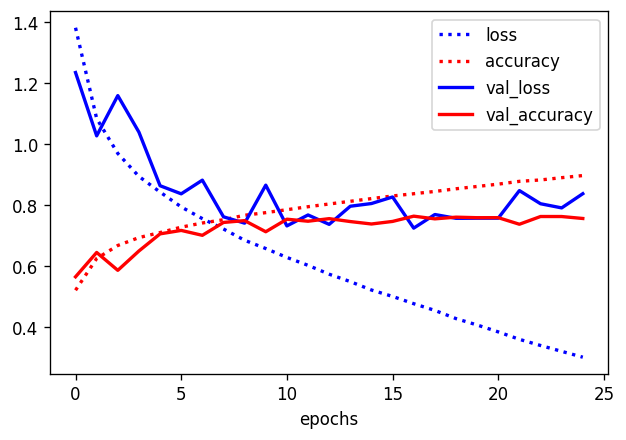

In [25]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import backend as K
from tensorflow.keras import models
from tensorflow.keras import layers 

K.clear_session()
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(32,32,3))

def build_model_4_1():
    freeze_all_layers = False
    n = 3 # Last n layers to unfreeze
    if freeze_all_layers:
        for layer in vgg.layers:
            layer.trainable = False
    else:
        for layer in vgg.layers[:-n]:
            layer.trainable = False
    model_4_1 = models.Sequential()
    model_4_1.add(vgg)
    model_4_1.add(layers.Flatten())
    model_4_1.add(layers.Dense(1024, activation='relu'))
    #model_4_1.add(layers.Dropout(0.5))
    model_4_1.add(layers.Dense(10, activation='softmax'))
    # If 'rms prop' - slightly better results, as numbers but starts to overfit
    # too much, That is the accuracy constantly increases whereas the 
    # val_accuracy barely changes. Decided to trade off better values for lack
    # of under-over fit
    model_4_1.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model_4_1
run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=True, epochs=25, batch_size=32)
answer_q_4_1 = """
              Comparing it to the model built in question 2, here we get
              worse performance. However the performance is not bad at all. It
              gets around 89% accuracy on the training and 75% on the valuation.
              However 25 epochs are bit too much because after roughly 10, the
              model starts to overfit quite a bit and 25 its overfitting a lot.
              Compared to having all layers frozen, unfreezing the last 3
              improves accuracy with 20%.
               """
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [26]:
import pickle
import gzip

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, Normalizer, PowerTransformer, OneHotEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.pipeline import make_pipeline

def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings():
    """ Stores all necessary embeddings to file
    """
    freeze_all_layers = False
    n = 3 # Last n layers to unfreeze
    if freeze_all_layers:
        for layer in vgg.layers:
            layer.trainable = False
    else:
        for layer in vgg.layers[:-n]:
            layer.trainable = False
    model_4_1 = models.Sequential()
    model_4_1.add(vgg)
    model_4_1.add(layers.Flatten())

    train_embed = model_4_1.predict(X_train)
    test_embed = model_4_1.predict(X_test)

    store_embedding(train_embed, 'X_train')
    store_embedding(test_embed, 'X_test')

def generate_pipeline():
    """ Returns an sklearn pipeline.
    """
    imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
    numeric_transformer = Pipeline(steps=[("imputer_num", imp_num)])
    imp_cat = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
    enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
    categorical_transformer = Pipeline(steps=[("imputer_cat", imp_cat), ("encoder", enc)])

    # Classifiers
    lr = LogisticRegression(random_state=1)
    svm_rbf = svm.SVC(kernel='rbf', random_state=1)
    rand_forest = RandomForestClassifier(random_state=1)
    # Scalers
    st_scaler = StandardScaler()
    norm = Normalizer()
    pt = PowerTransformer()

    #pipito = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', svm_rbf)])

    pipito = make_pipeline(st_scaler, svm_rbf)
    
    return pipito


def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
    """ Evaluates the given pipeline, trained on the given embedded training set and 
        evaluated on the supplied embedded test set. Returns the accuracy score.
    """
    pipeline.fit(X_train, y_train)
    return pipeline.score(X_test, y_test)
  
def evaluation_4_2(X_train, y_train, X_test, y_test):
    """ Runs 'evaluate_pipeline' with embedded versions of the input data 
    and returns the accuracy.
    """

    store_embeddings()

    train_embed_2 = load_embedding('X_train')
    test_embed_2 = load_embedding('X_test')
    #print(train_embed_2[1])
    #print(y_train.type)
    new_y_train = []
    for label in y_train:
        new_y_train.append(np.argmax(label))
    
    new_y_train_arr = np.array(new_y_train)
    new_y_test = []
    for label in y_test:
        new_y_test.append(np.argmax(label))

    new_y_test_arr = np.array(new_y_test)


    pipe = generate_pipeline()
    pipe_score = evaluate_pipeline(pipe, train_embed_2, new_y_train_arr, test_embed_2, new_y_test_arr)
    print(pipe_score)
    
  
evaluation_4_2(X_train, y_train, X_test, y_test)

answer_q_4_2 = """
              The obtained accuracy is better than the previous taks, now it is
              at around 80%! The pipeline is very simple using a standard scaler
              and a svm classifier. The normalizer and power tranformer gave
              really bad resukts around 55-56% accuracy. The crucial part to get
              the pipeline working was to transform the "y" data sets to contain
              a single digit and not an array, representing the true values.
              Using a standard scaler with a logistic regression, gave slightly
              worse results around 76%.
               """
print("Pipeline:",generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))

0.7839158021955887
Pipeline: Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Answer is 613 characters long


In [29]:
%cd /content/drive/My\ Drive/assignment-3-T-Zahariev
!python ./verify.py

/content/drive/My Drive/assignment-3-T-Zahariev
Converting: Assignment 3.ipynb
Running notebook... (may take a while)
/usr/local/lib/python3.6/dist-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
2020-04-19 12:26:27.844846: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-04-19 12:26:27.844990: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-04-19 12:26:27.845021: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libr